## Урок 10. Домашнее задание 

### 10.1 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика силуэтта? Стало лучше или хуже? Какое количество кластеров лучше, два или четыре?

In [1]:
import pickle

with open("data/7.10._clustering.pkl", 'rb') as f:
    cluster_data = pickle.load(f)
    
X = cluster_data['X']
Y = cluster_data['Y']

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

model_4 = KMeans(n_clusters=4).fit(X)
score_4 = silhouette_score(X, model_4.labels_)
score_4

0.4388619866610211

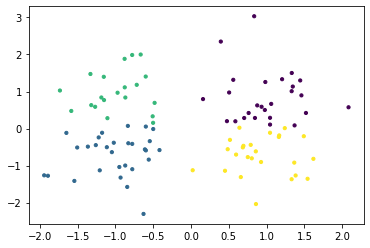

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], 10, c=model_4.labels_)
plt.show()

In [4]:
model_2 = KMeans(n_clusters=2).fit(X)
score_2 = silhouette_score(X, model_2.labels_)
score_2

0.4465356047465253

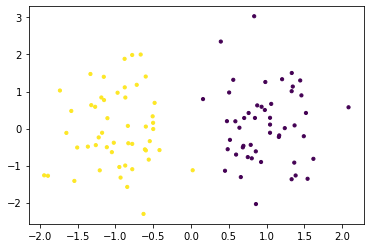

In [5]:
plt.scatter(X[:, 0], X[:, 1], 10, c=model_2.labels_)
plt.show()

In [6]:
model_3 = KMeans(n_clusters=3).fit(X)
score_3 = silhouette_score(X, model_3.labels_)
score_3

0.4523966375832621

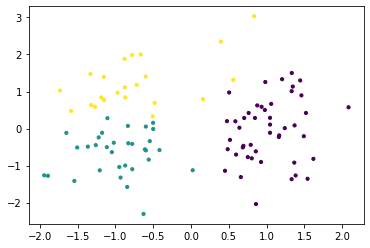

In [7]:
plt.scatter(X[:, 0], X[:, 1], 10, c=model_3.labels_)
plt.show()

In [8]:
print("2 clusters - {:.5f}\n3 clusters - {:.5f}\n4 clusters - {:.5f}\n".format(score_2, score_3, score_4))

2 clusters - 0.44654
3 clusters - 0.45240
4 clusters - 0.43886



**Метрика силуэтта при 4 кластерах ухудшилась и стала хуже чем при 2 кластерах.**


### 10.2 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика *AMI*? Стало лучше или хуже? Какое количество кластеров лучше по метрике AMI?

In [9]:
from sklearn.metrics import adjusted_mutual_info_score

ami_score_4 = adjusted_mutual_info_score(Y, model_4.labels_, average_method='arithmetic')
ami_score_4

0.5815916539517929

In [10]:
ami_score_2 = adjusted_mutual_info_score(Y, model_2.labels_, average_method='arithmetic')
ami_score_3 = adjusted_mutual_info_score(Y, model_3.labels_, average_method='arithmetic')
print("2 clusters - {:.5f}\n3 clusters - {:.5f}\n4 clusters - {:.5f}\n".format(ami_score_2, ami_score_3, ami_score_4))

2 clusters - 0.92860
3 clusters - 0.61390
4 clusters - 0.58159



**По метрике AMI 4 кластера хуже 3, а лучший результат дает деление на 2 кластера**


### 10.3 Домашнее задание высокого уровня

Загрузите датасет `clustering_hw.csv` из приложенной директории `data` и визуализируйте данные. Должно получится как-то так:

![clustering_hw](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/clustering_hw.png)

В рамках домашней работы

1. вычислите оптимальное количество кластеров $k$
1. обучите k-means с количеством кластеров  $k$
1. к какому кластеру принадлежит точка $x=(5, 8)$? к какому кластеру принадлежит точка $x=(0, 5)$? Они принадлежат к разным кластерам или одному?
1. Каково качество кластеризации по AMI

In [11]:
import pandas as pd
import numpy as np
data = pd.read_csv("data/7.10_clustering_hw.csv")
data.head()

,x1,x2,y
0,6.221343,4.968753,2
1,7.360892,8.857455,2
2,-0.108178,4.730723,1
3,3.127358,1.927986,0
4,-0.817259,6.759974,1


In [12]:
X = data[['x1', 'x2']].to_numpy()
Y = data['y'].to_numpy()

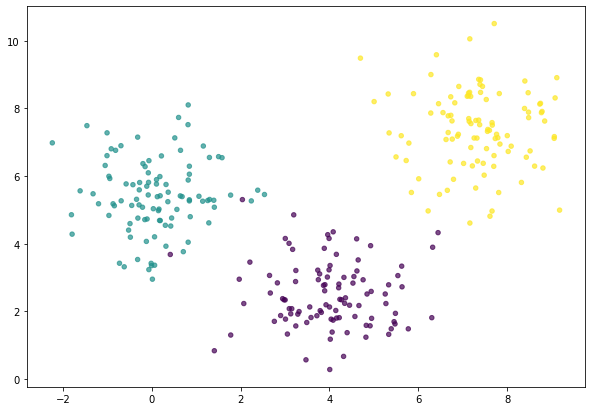

In [13]:
plt.figure(figsize=(10, 7))
plt.scatter(data.x1, data.x2, 20, c=data.y, alpha=0.7)
plt.show()

In [14]:
from sklearn.metrics.pairwise import euclidean_distances

metrics = []
MAX_CLUSTERS = 10

for cluster_num in range(1, MAX_CLUSTERS):
    kmeans_model = KMeans(n_clusters=cluster_num, random_state=43).fit(X)
    centroids, labels = kmeans_model.cluster_centers_, kmeans_model.labels_
    metric = 0
    for centroid_label in range(cluster_num):
        metric += euclidean_distances(
            X[labels==centroid_label],
            centroids[centroid_label, :].reshape(1, -1)
        ).sum(axis=0)[0]
#     print("Cluster number {}, metric {:.4f}".format(cluster_num, metric))
    metrics.append(metric)

Best cluster number is 3


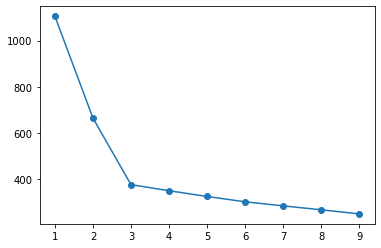

In [15]:
D = []
for i in range(len(metrics)-1):
    d = abs(metrics[i+1] - metrics[i]) / abs(metrics[i] - metrics[i-1])
    D.append(d)
best_num = np.argmin(D) + 1
print("Best cluster number is {}".format(best_num))

plt.plot([i+1 for i in range(len(metrics))], metrics, marker='o')
plt.show()

In [16]:
best_model = KMeans(n_clusters=best_num, random_state=43).fit(X)

ami_score = adjusted_mutual_info_score(Y, best_model.labels_)
print(f"Качество кластеризации по AMI = {ami_score:.3f}")

Качество кластеризации по AMI = 0.970


In [17]:
# Добавим заданные точки к массиву X и обучим новую модель

x1 = (5, 8)
x2 = (0, 5)
X1 = np.append(X, [x1, x2], axis=0)

new_model = KMeans(n_clusters=best_num, random_state=43).fit(X1)

print(f"Точка (5,8) согласно модели относится к кластеру {new_model.labels_[-2]}")
print(f"Точка (0,5) согласно модели относится к кластеру {new_model.labels_[-1]}")

Точка (5,8) согласно модели относится к кластеру 1
Точка (0,5) согласно модели относится к кластеру 2


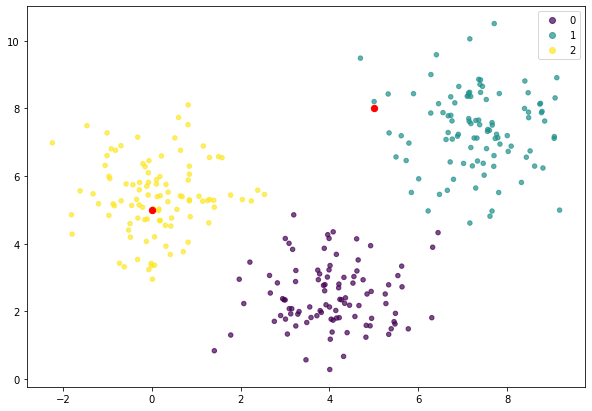

In [18]:
# Визуализируем полученные кластеры и заданные точки

plt.figure(figsize=(10, 7))

scatter = plt.scatter(data.x1, data.x2, 20, c=best_model.labels_.astype(float), alpha=0.7)

plt.legend(handles=scatter.legend_elements()[0], labels=map(str, np.sort(data.y.unique())))

plt.scatter(x1[0], x1[1], 40, c='r')
plt.scatter(x2[0], x2[1], 40, c='r')

plt.show()

### Заключение

Мы познакомились с двумя метриками

* Silhouette. Её используем, когда есть только сами объекты, а метки кластеров отсутствуют в обучающей выборке
* AMI. Её используем, когда известны "истинные" метки кластеров

Метрик намного больше - о них можно почитать [ в документации sklearn](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics)